# Assignment 4:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole eercise. 
    
## 0.05
    
    For each test phrase the Null Hypothesis in words.   

##  Idea:  Proportionally more men use citibike than women (P0 > P1)
##  Null Hypothesis:  Women use citibike as much as or more than men (H0: P1 - P0 <= 0)
##  Alt Hypothesis:  Men use citibike more than women (H1: P0 - P1 > 0)
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [22]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import zipfile
%pylab inline

# IMPORT DATA (AVAILABLE TO EVERY USER) - June 2015

datestring = '201506'

!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf_June15 = zipfile.ZipFile(datestring1+'-citibike-tripdata.zip')
df_June15 = pd.read_csv(zf_June15.open(datestring1+'-citibike-tripdata.csv'))

# Note:  Originally I downloaded the July 2015 data as well, and appended it to the June 2015 data via the
# append method.  However, when I tried to run the "age by gender" code, I was getting a duplicate error
# that I couldn't solve.  So I just proceeded with the June 2015 data.


Populating the interactive namespace from numpy and matplotlib
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.8M  100 21.8M    0     0  10.1M      0  0:00:02  0:00:02 --:--:-- 11.1M


In [23]:
# Convert 'starttime' column to readable date format
df_June15['date'] = pd.to_datetime(df_June15['starttime'])   

In [24]:
# Render Top 10 Rows of Data Frame
df_June15.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00
5,690,6/1/2015 0:03,6/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,410,Suffolk St & Stanton St,40.720664,-73.985180,20857,Subscriber,1976.0,1,2015-06-01 00:03:00
6,766,6/1/2015 0:04,6/1/2015 0:17,346,Bank St & Hudson St,40.736529,-74.006180,2003,1 Ave & E 18 St,40.733812,-73.980544,15978,Subscriber,1976.0,1,2015-06-01 00:04:00
7,1160,6/1/2015 0:06,6/1/2015 0:25,512,W 29 St & 9 Ave,40.750073,-73.998393,445,E 10 St & Avenue A,40.727408,-73.981420,17306,Subscriber,1962.0,2,2015-06-01 00:06:00
8,550,6/1/2015 0:07,6/1/2015 0:16,525,W 34 St & 11 Ave,40.755942,-74.002116,447,8 Ave & W 52 St,40.763707,-73.985162,18392,Subscriber,1973.0,1,2015-06-01 00:07:00
9,545,6/1/2015 0:08,6/1/2015 0:17,403,E 2 St & 2 Ave,40.725029,-73.990697,439,E 4 St & 2 Ave,40.726281,-73.989780,16300,Subscriber,1958.0,1,2015-06-01 00:08:00


In [26]:
# Get age by gender - Professor Provided Code

df_June15['ageM'] = 2016 - df_June15['birth year'][(df_June15['usertype'] == 'Subscriber') & (df_June15['gender'] == 1)]
df_June15['ageF'] = 2016 - df_June15['birth year'][(df_June15['usertype'] == 'Subscriber') & (df_June15['gender'] == 2)]

In [27]:
# Description Table

df_June15.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,9.412190e+05,941219.000000,941219.000000,941219.000000,941219.000000,941219.000000,941219.000000,941219.000000,810827.000000,941219.000000,621580.000000,188655.000000
mean,9.046028e+02,459.987285,40.734750,-73.991312,458.256856,40.734420,-73.991443,18174.511302,1976.256380,1.061284,40.113612,38.509560
std,3.446744e+03,384.455415,0.019363,0.012420,383.179189,0.019332,0.012430,2113.307306,11.465324,0.579512,11.483732,11.221308
min,6.000000e+01,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1885.000000,0.000000,17.000000,17.000000
25%,4.010000e+02,306.000000,40.721101,-74.001497,305.000000,40.720828,-74.001547,16370.000000,NaN,1.000000,NaN,NaN
50%,6.460000e+02,415.000000,40.736494,-73.990985,411.000000,40.736245,-73.990985,18158.000000,NaN,1.000000,NaN,NaN
75%,1.064000e+03,492.000000,40.750200,-73.982050,490.000000,40.749156,-73.982050,19944.000000,NaN,1.000000,NaN,NaN
max,1.691873e+06,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,22364.000000,1999.000000,2.000000,131.000000,115.000000


In [28]:
# Drop NaN Values - Professor Provided Code

df_June15['ageM'].dropna(inplace= True)
df_June15['ageF'].dropna(inplace= True)

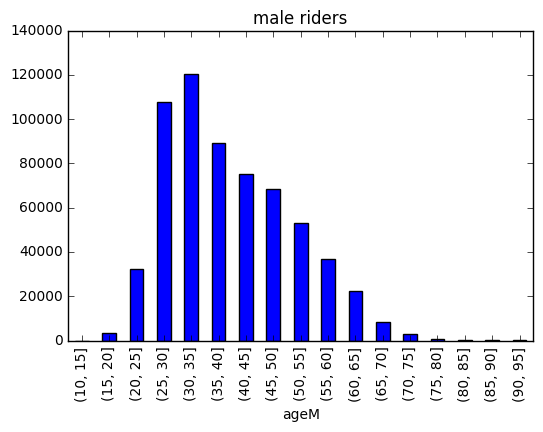

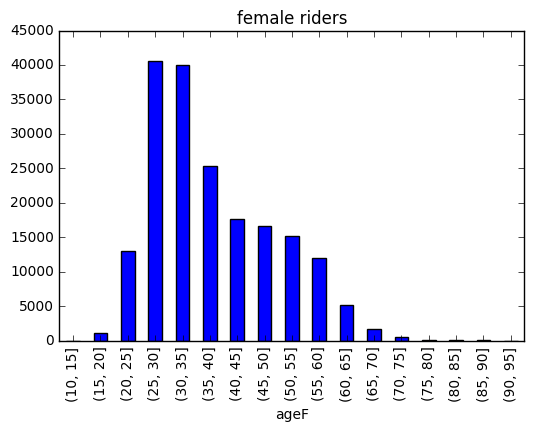

In [29]:
# Histograms - Number of Riders by Age Range, Male and Female - Professor Provided Code

bins = np.arange(10, 99, 5)
axM = df_June15.ageM.groupby(pd.cut(df_June15.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df_June15.ageF.groupby(pd.cut(df_June15.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000206
(20, 25]       0.016503
(25, 30]       0.058428
(30, 35]       0.076423
(35, 40]       0.066680
(40, 45]       0.039684
(45, 50]       0.017683
(50, 55]       0.012263
(55, 60]       0.016593
(60, 65]       0.008205
(65, 70]       0.003076
(70, 75]       0.000392
(75, 80]       0.000214
(80, 85]       0.000017
(85, 90]       0.000006
(90, 95]       0.000000


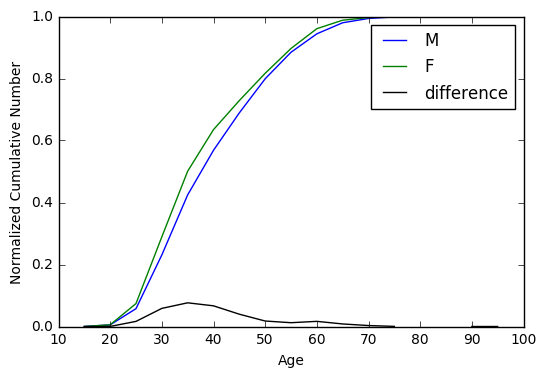

In [30]:
#print df.ageS, df.ageS.cumsum() - Professor Provided Code

csM=df_June15.ageM.groupby(pd.cut(df_June15.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df_June15.ageF.groupby(pd.cut(df_June15.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [33]:
import scipy.stats  # Professor Provided Code

In [50]:
ks = scipy.stats.ks_2samp(df_June15.ageM, df_June15.ageF)
print (ks)

Ks_2sampResult(statistic=0.10198128989711536, pvalue=0.0)


## Analysis

### At a significance level of 0.05, the critical KS value is 1.36 (in the table provided in the example text).  The calculated KS statistic is approximate;y 0.102, much lower than the critical value.  Because it is lower than the threshold, we cannot reject the Null Hypothesis.

In [45]:
# Redo Analysis with subset of the data (1 ride of every 200)
sub = int(len(df_June15.index)/200)
df_reduct = df_June15.sample(sub) # Sample method used to obtain subset of data frame 
                                  # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html


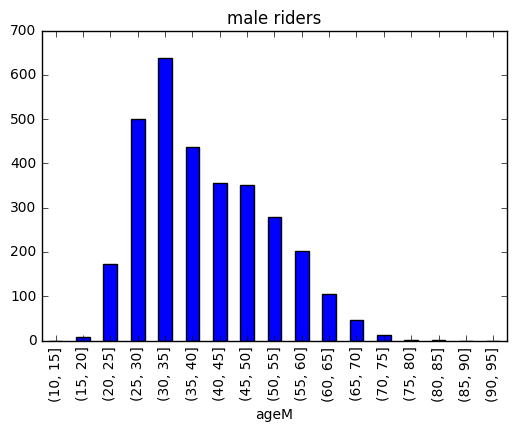

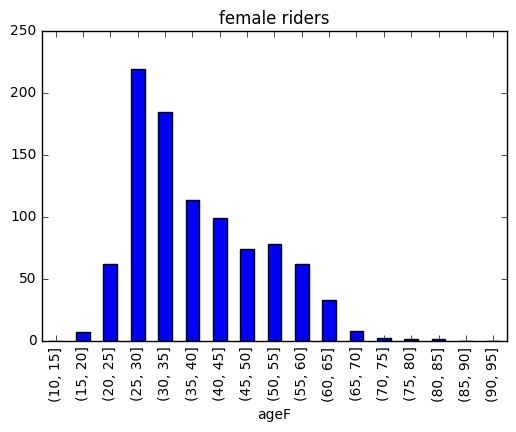

In [46]:
# Histograms of Subset - Number of Riders by Age Range, Male and Female - Professor Provided Code

bins = np.arange(10, 99, 5)
axM = df_reduct.ageM.groupby(pd.cut(df_reduct.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df_reduct.ageF.groupby(pd.cut(df_reduct.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.004530
(20, 25]       0.014669
(25, 30]       0.086186
(30, 35]       0.076551
(35, 40]       0.055912
(40, 45]       0.046785
(45, 50]       0.012111
(50, 55]       0.004822
(55, 60]       0.005639
(60, 65]       0.006882
(65, 70]       0.000580
(70, 75]       0.001157
(75, 80]       0.000739
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


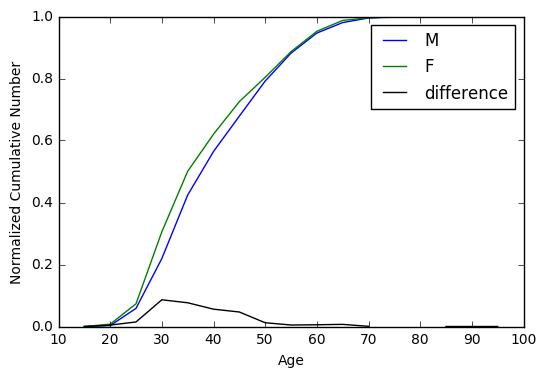

In [48]:
#print df.ageS, df.ageS.cumsum() - Professor Provided Code  SUBSET

csM=df_reduct.ageM.groupby(pd.cut(df_reduct.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df_reduct.ageF.groupby(pd.cut(df_reduct.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [52]:
# dropping NaN values
df_reduct['ageM'].dropna(inplace= True)
df_reduct['ageF'].dropna(inplace= True)

# KS Test

ks_2 = scipy.stats.ks_2samp(df_reduct.ageM, df_reduct.ageF)
print (ks_2)

Ks_2sampResult(statistic=0.11279034848123944, pvalue=1.7015428032389201e-08)


## Analysis For Subset Data

### At a significance level of 0.05, the critical KS value is 1.36 (in the table provided in the example text).  The calculated KS statistic is approximate;y 0.113, much lower than the critical value.  Because it is lower than the threshold, we cannot reject the Null Hypothesis.

In [73]:
# Pearson's Test

# Equalize Sample Sizes

if len(df_June15['ageF'].index) > len(df_June15['ageM'].index):
    f_Reduct = df_June15['ageF'].sample(len(df_June15['ageM'].index))
    print ("The female sample size has been reduced to the male sample size")

else:
    m_Reduct = df_June15['ageM'].sample(len(df_June15['ageF'].index))
    print ("The male sample size has been reduced to the female sample size")





The male sample size has been reduced to the female sample size


In [75]:
# Sort

#df_June15['ageM'].sort('ageM', ascending = 'True')

df_Men = m_Reduct.copy()
df_Women = df_June15['ageF'].copy()

df_Men.sort()
df_Women.sort()

pc = scipy.stats.pearsonr(df_Men, df_Women)

print (pc)

(0.99653653757796501, 0.0)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


## Analysis

### The calculated pearson's coefficient is approximately 0.997, indicating a very strong positive relationship between the two variables (a calculated coefficient of 1 indicating the strong possible correlation).  Under this condtion, it would be expected that as one variable increases, the other would too (and as one decreased, the other one would as well).  Regarding the Null Hypothesis, this relationship indicates that the proportional number of male riders would be relatively equal to the proportion of female riders (i.e., P0 = P1), so the Null cannot be rejected using the results of this test.

### The p-value indicated the probability of the results of the test being random.  The calculated p-value for this analysis is 0, which states a 0 % chance these results are random.

In [79]:
# Spearman's Test

scipy.stats.spearmanr(df_Men, df_Women)   # Formatted data for Pearson's test reused here


SpearmanrResult(correlation=0.99900064209888695, pvalue=0.0)

## Analysis 

### Similar to the pearson's coefficient, the spearmen's coefficient indicates a very high positive correlation (0.999), which indicates that as one variable increases the other would be expected to as well.  Regarding the Null Hypothesis, this relationship indicates that the proportional number of male riders would be relatively equal to the proportion of female riders (i.e., P0 = P1), so the Null cannot be rejected using the results of this test.

### The p-value indicated the probability of the results of the test being random.  The calculated p-value for this analysis is 0, which states a 0 % chance these results are random.